## Traveloka vs. BukitVista

comparison of property prices across different areas

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

bv = pd.read_csv('../dataset/BukitVistaScrape.csv')
bv = bv.drop(columns='Unnamed: 0')
bv['DataSource'] = 'BukitVista'
bv.head()


,VillaName,Address,Bedrooms,Bathrooms,GuestNo,PropertyType,URL,Area,Currency,PriceValue,Unit,Features,DataSource
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",2,2.0,4.0,['Villa'],https://www.bukitvista.com/property/uluwatu-mo...,Uluwatu,USD,129.0,night,"['Amazing pool', 'Island life', 'Pool view', '...",BukitVista
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",3,3.0,6.0,['Villa'],https://www.bukitvista.com/property/bingin-bea...,Pecatu,USD,161.0,night,"['Amazing pool', 'Island life', 'Pool view', '...",BukitVista
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",4,4.0,8.0,['Villa'],https://www.bukitvista.com/property/mediterran...,Ubud,USD,202.0,night,"['Amazing pool', 'Amazing View', 'Jungle View'...",BukitVista
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,NaN,3,4.0,6.0,['Villa'],https://www.bukitvista.com/property/nusa-dua-s...,Nusa Dua,USD,357.5,night,['Beachfront'],BukitVista
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",2,2.0,4.0,['Villa'],https://www.bukitvista.com/property/grand-vill...,Ungasan,USD,84.0,night,"['Amazing pool', 'Golfing', 'Pool view']",BukitVista


In [3]:
tl = pd.read_csv('../dataset/TravelokaScrape.csv')
tl = tl.drop(columns='Unnamed: 0')
tl['DataSource'] = 'Traveloka'
tl.head()

,VillaName,Features,Rating,Total_Review,Rating_Info,Location,URL,Currency,PriceValue,Area,DataSource
0,Hanging Gardens Of Bali,"['Cycling', 'Outdoor facilities', 'Massage', '...",8.5,30.0,Impressive,"Payangan, Ubud",www.traveloka.com/en-en/hotel/indonesia/hangin...,USD,722.65,Ubud,Traveloka
1,The Bali Dream Villa Resort Echo Beach Canggu,"['Sun loungers', 'Massage', 'Kitchenette', 'Po...",8.3,26.0,Impressive,"Canggu, Kuta Utara",www.traveloka.com/en-en/hotel/indonesia/the-ba...,USD,50.13,Canggu,Traveloka
2,Menjangan Dynasty Resort,"['Snorkeling', 'Canoeing', 'Horse riding', 'Di...",9.1,135.0,Superb,"Menjangan, Buleleng",www.traveloka.com/en-en/hotel/indonesia/menjan...,USD,156.45,Others,Traveloka
3,AYANA Villas Bali,"['Show cooking restaurant', 'Beach Bar', 'Busi...",8.7,23.0,Impressive,"Jimbaran, Kuta Selatan",www.traveloka.com/en-en/hotel/indonesia/ayana-...,USD,1156.73,Jimbaran,Traveloka
4,Elevate Bali,"['Canoeing', 'Diving', 'Massage', 'Airport tra...",9.8,6.0,Superb,"Munduk, Buleleng",www.traveloka.com/en-en/hotel/indonesia/elevat...,USD,313.70,Others,Traveloka


In [4]:
#appending both datasets for price comparisons
df_bv_selected = bv[['DataSource', 'VillaName', 'URL', 'Area', 'Currency', 'PriceValue', 'Features']]
df_traveloka_selected = tl[['DataSource', 'VillaName', 'URL', 'Area', 'Currency', 'PriceValue', 'Features']]

final_df = pd.concat([df_bv_selected, df_traveloka_selected], ignore_index=True)
final_df

,DataSource,VillaName,URL,Area,Currency,PriceValue,Features
0,BukitVista,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,https://www.bukitvista.com/property/uluwatu-mo...,Uluwatu,USD,129.00,"['Amazing pool', 'Island life', 'Pool view', '..."
1,BukitVista,Bingin Beach Hideaway: Group Villa with Pool &...,https://www.bukitvista.com/property/bingin-bea...,Pecatu,USD,161.00,"['Amazing pool', 'Island life', 'Pool view', '..."
2,BukitVista,4-Bedroom Mediterranean Luxury Villa with Ubud...,https://www.bukitvista.com/property/mediterran...,Ubud,USD,202.00,"['Amazing pool', 'Amazing View', 'Jungle View'..."
3,BukitVista,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,https://www.bukitvista.com/property/nusa-dua-s...,Nusa Dua,USD,357.50,['Beachfront']
4,BukitVista,Grand Villa Retreat w/ Pool & Garden in Ungasan,https://www.bukitvista.com/property/grand-vill...,Ungasan,USD,84.00,"['Amazing pool', 'Golfing', 'Pool view']"
...,...,...,...,...,...,...,...
621,Traveloka,The Nakula Villas,www.traveloka.com/en-en/hotel/indonesia/the-na...,Legian,USD,235.99,"['Babysitting', 'Bicycle rental', 'Car rental'..."
622,Traveloka,Alam Puri Art Museum Villa,www.traveloka.com/en-en/hotel/indonesia/alam-p...,Denpasar,USD,73.98,"['Babysitting', 'Bicycle rental', 'Car rental'..."
623,Traveloka,Villa Puri Royan Jimbaran,www.traveloka.com/en-en/hotel/indonesia/villa-...,Jimbaran,USD,20.75,"['Limo or town car service', 'Car rental']"
624,Traveloka,Kei Villas,www.traveloka.com/en-en/hotel/indonesia/kei-vi...,Seminyak,USD,224.16,"['Bicycle rental', 'Car rental', 'Airport tran..."


In [5]:
final_df.to_csv('CombinedData.csv')

Text(0.5, 0, 'DataSource')

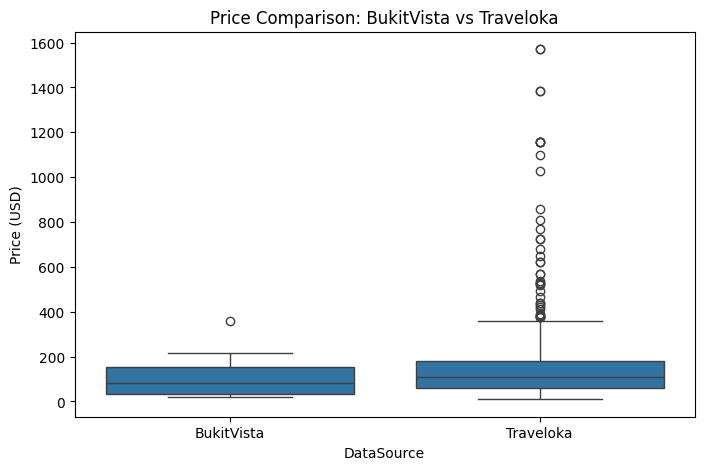

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='DataSource', y='PriceValue', data=final_df)
plt.title('Price Comparison: BukitVista vs Traveloka')
plt.ylabel('Price (USD)')
plt.xlabel('DataSource')

Text(0.5, 0, 'DataSource')

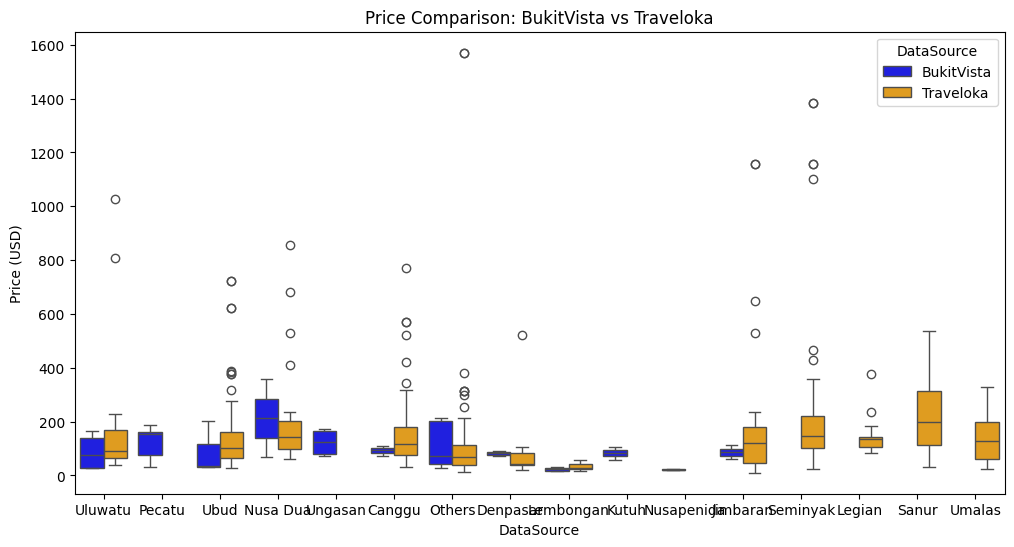

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area', y='PriceValue', hue ='DataSource', data=final_df, palette=['blue','orange'])
plt.title('Price Comparison: BukitVista vs Traveloka')
plt.ylabel('Price (USD)')
plt.xlabel('DataSource')

In [8]:
tl['Features'].unique()

array(["['Cycling', 'Outdoor facilities', 'Massage', 'Library', 'Express check-out', 'Bar']",
       "['Sun loungers', 'Massage', 'Kitchenette', 'Pool sun loungers', 'Spa', 'Bar']",
       "['Snorkeling', 'Canoeing', 'Horse riding', 'Diving', 'Beach sun loungers', 'Bar']",
       "['Show cooking restaurant', 'Beach Bar', 'Business facilities', 'Poolside bar', 'Wheelchair accessible', 'Bar']",
       "['Canoeing', 'Diving', 'Massage', 'Airport transfer', 'Express check-out', 'Bar']",
       "['Badminton', 'Cycling', 'Clothes dryer', 'Billiard', 'Rooftop terrace', 'Bar']",
       "['Horse riding', 'Beach sun loungers', 'Beach towel', 'Fitness center', 'Beach umbrella', 'Bar']",
       "['Babysitting', 'Car rental', 'Massage', 'Kitchenette', 'Airport transfer', 'Express check-out']",
       "['Babysitting', 'Bicycle rental', 'Car rental', 'Massage']",
       "['Show cooking restaurant', 'Cycling', 'Outdoor facilities', 'Massage', 'Poolside bar', 'Bar']",
       "['Hot tub', 'Beach towel',